In [29]:
import plotly as plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from collections import Counter
import math
import datetime as datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics
import glob
import ipyplot
import numpy as np
from functions import data_preprocess_functions
from matplotlib.colors import LogNorm

from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt


In [2]:
dir_name = 'idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/'

agg_beam_ext_filename = dir_name + 'idl_aggregated_fulldata_20170101_to_20201231.csv'

agg_df = pd.read_csv(agg_beam_ext_filename)


In [3]:
agg_df = agg_df.loc[agg_df['compression_mode'],:]

In [66]:
index = (agg_df['region'] == 'Lobe' ) & (agg_df['flux'] > 0) & (abs(agg_df['ygsm']) < 15) & (agg_df['xgsm'] < -7) & (agg_df['xgsm'] > -17)
print(statistics.median(agg_df.loc[index,'n']))
# agg_df.loc[index,['datetime_str','n']]

fig = px.histogram(agg_df.loc[index,:], x=np.log10(agg_df.loc[index,"n"]) ,  facet_col = 'region')

fig.for_each_xaxis(lambda xaxis: xaxis.update(dict(
    tickvals=[-5,-4,-3,-2],
    ticktext=["0.00001", "0.0001", "0.001", "0.01"]
)))

fig.show()


0.00400388554340605


/home/jliao/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [50]:
index = (agg_df.flux > 0) & (agg_df['region'] != 'Dayside') & (abs(agg_df['ygsm']) < 15)& (agg_df['xgsm'] < -7) & (agg_df['xgsm'] > -17)

fig = px.scatter(agg_df.loc[index,:], x='xgsm', y='zgsm', color=np.log10(agg_df.loc[index,"n"]),range_color=[-5,-1], facet_col = 'region'
                )
fig.update_layout(coloraxis_colorbar=dict(
    title="density",
    tickvals=[-5,-4,-3,-2],
    ticktext=["0.00001", "0.0001", "0.001", "0.01"],
))

fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))

fig.show()


/home/jliao/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [51]:
index = (agg_df.intergrated_flux > 0) & (agg_df['region'] != 'Dayside') & (abs(agg_df['ygsm']) < 20)

fig = px.scatter(agg_df.loc[index,:], x='xgsm', y='n', color='region', log_y=True
                , category_orders={"region":["Lobe","BL","PS"]}
#                 , trendline="ols", trendline_options=dict(log_y=True)
                )
fig.update_yaxes(range=[-5, -1])
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))

fig.show()

In [57]:
xedges = range(-30,10,2)
yedges = range(-20,20,2)

x_label = 'xgsm'
y_label = 'ygsm'

samples = data_preprocess_functions.calculate_occurrence_rate(agg_df[x_label],agg_df[y_label],xedges,yedges)

events = data_preprocess_functions.calculate_occurrence_rate(agg_df.loc[agg_df.flux > 0,x_label], agg_df[agg_df.flux > 0,y_label], xedges,yedges) 

occurrence_rate=np.divide(events,samples)

intergrated_flux = data_preprocess_functions.calculate_density_heatmap(agg_df.loc[agg_df.flux > 0,x_label], agg_df.loc[agg_df.flux > 0,y_label], agg_df.loc[agg_df.flux > 0, 'intergrated_flux'], xedges, yedges)       

avg_flux = np.multiply(intergrated_flux,occurrence_rate)

density = data_preprocess_functions.calculate_density_heatmap(agg_df.loc[agg_df.flux > 0,x_label],agg_df.loc[agg_df.flux > 0,y_label],agg_df.loc[agg_df.flux > 0,'n'],xedges,yedges)

avg_density = np.multiply(density,occurrence_rate)


NameError: name 'occurrence_rate' is not defined

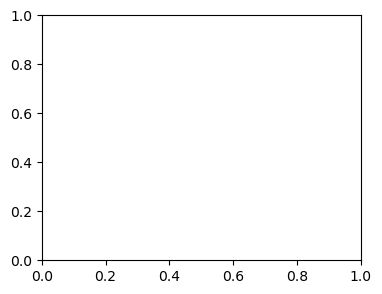

In [13]:
plt.figure(figsize=(14,7))

plt.subplot(231)
pos = plt.imshow(occurrence_rate, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('Occurrence frequency', rotation=90)

plt.subplot(232)
pos = plt.imshow(intergrated_flux, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('Intergrated flux', rotation=90)

plt.subplot(233)
pos = plt.imshow(density, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e-4, vmax=1e-2))

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('Density', rotation=90)

plt.subplot(235)
pos = plt.imshow(avg_flux, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('avg flux', rotation=90)

plt.subplot(236)
pos = plt.imshow(avg_density, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e-4, vmax=1e-2))

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('avg density', rotation=90)

plt.show()

In [14]:
index_lobe = df_ext['beta'] <= 0.05

samples_lobe = data_preprocess_functions.calculate_occurrence_rate(df_ext.loc[index_lobe,x_label],df_ext.loc[index_lobe,y_label],xedges,yedges)

events_lobe = data_preprocess_functions.calculate_occurrence_rate(df_ext_beam.loc[index_lobe,x_label],df_ext_beam.loc[index_lobe,y_label],xedges,yedges)

occurrence_rate_lobe = np.divide(events_lobe,samples_lobe)

index_bl = (df_ext['beta'] > 0.05) & (df_ext['beta'] <= 1)

samples_bl = data_preprocess_functions.calculate_occurrence_rate(df_ext.loc[index_bl,x_label],df_ext.loc[index_bl,y_label],xedges,yedges)

events_bl = data_preprocess_functions.calculate_occurrence_rate(df_ext_beam.loc[index_bl,x_label],df_ext_beam.loc[index_bl,y_label],xedges,yedges)

occurrence_rate_bl = np.divide(events_bl,samples_bl)

index_ps = df_ext['beta'] > 1

samples_ps = data_preprocess_functions.calculate_occurrence_rate(df_ext.loc[index_ps,x_label],df_ext.loc[index_ps,y_label],xedges,yedges)

events_ps = data_preprocess_functions.calculate_occurrence_rate(df_ext_beam.loc[index_ps,x_label],df_ext_beam.loc[index_ps,y_label],xedges,yedges)

occurrence_rate_ps = np.divide(events_ps, samples_ps)


NameError: name 'df_ext' is not defined

In [15]:
index = agg_df['region'] == 'Lobe'

intergrated_flux_lobe = data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'intergrated_flux'],xedges,yedges)       

avg_flux_lobe = np.multiply(intergrated_flux_lobe,occurrence_rate_lobe)

index = agg_df['region'] == 'BL'

intergrated_flux_bl = np.multiply(data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'intergrated_flux'],xedges,yedges), occurrence_rate_lobe)

avg_flux_bl = np.multiply(intergrated_flux_bl , occurrence_rate_bl)

index = agg_df['region'] == 'PS'

intergrated_flux_ps = np.multiply(data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'intergrated_flux'],xedges,yedges), occurrence_rate_lobe)

avg_flux_ps = np.multiply(intergrated_flux_ps , occurrence_rate_ps)

NameError: name 'occurrence_rate_lobe' is not defined

NameError: name 'occurrence_rate_lobe' is not defined

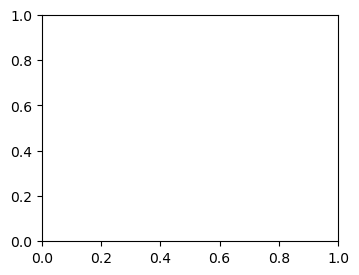

In [16]:
plt.figure(figsize=(13,10))

plt.subplot(331)
pos = plt.imshow(occurrence_rate_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(332)
pos = plt.imshow(occurrence_rate_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(333)
pos = plt.imshow(occurrence_rate_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('occurrence rate', rotation=90)

plt.subplot(334)
pos = plt.imshow(intergrated_flux_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(335)
pos = plt.imshow(intergrated_flux_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(336)
pos = plt.imshow(intergrated_flux_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('intergrated flux', rotation=90)


plt.subplot(337)
pos = plt.imshow(avg_flux_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(338)
pos = plt.imshow(avg_flux_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(339)
pos = plt.imshow(avg_flux_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=1e3, vmax=1e5))
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('avg flux', rotation=90)


plt.show()


In [17]:
index = agg_df['region'] == 'Lobe'

density_lobe = data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'density_est'],xedges,yedges)

avg_density_lobe = np.multiply(density_lobe , occurrence_rate_lobe)

index = agg_df['region'] == 'BL'

density_bl = np.multiply(data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'density_est'],xedges,yedges), occurrence_rate_lobe)

avg_density_bl = np.multiply(density_bl , occurrence_rate_bl)

index = agg_df['region'] == 'PS'

density_ps = np.multiply(data_preprocess_functions.calculate_density_heatmap(agg_df.loc[index,x_label],agg_df.loc[index,y_label],agg_df.loc[index,'density_est'],xedges,yedges), occurrence_rate_lobe)

avg_density_ps = np.multiply(density_ps , occurrence_rate_ps)


NameError: name 'occurrence_rate_lobe' is not defined

NameError: name 'occurrence_rate_lobe' is not defined

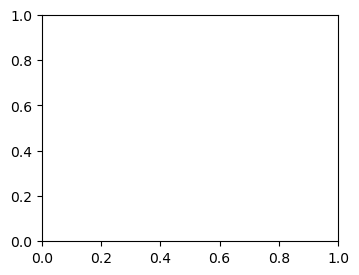

In [18]:
plt.figure(figsize=(13,10))

plt.subplot(331)
pos = plt.imshow(occurrence_rate_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(332)
pos = plt.imshow(occurrence_rate_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(333)
pos = plt.imshow(occurrence_rate_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',vmin=0,vmax=1)
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('occurrence rate', rotation=90)

plt.subplot(334)
pos = plt.imshow(density_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(335)
pos = plt.imshow(density_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(336)
pos = plt.imshow(density_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('density', rotation=90)


plt.subplot(337)
pos = plt.imshow(avg_density_lobe, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('Lobe', y=1.02, fontsize=12)

plt.subplot(338)
pos = plt.imshow(avg_density_bl, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('BL', y=1.02, fontsize=12)

plt.subplot(339)
pos = plt.imshow(avg_density_ps, interpolation='none', origin='lower',extent=[xedges[0], xedges[-1]+xedges.step, yedges[0], yedges[-1]+yedges.step], cmap='jet',norm=LogNorm(vmin=0.0001, vmax=0.01))
plt.title('PS', y=1.02, fontsize=12)

cbar = plt.colorbar(pos)
cbar.ax.set_ylabel('avg density', rotation=90)


plt.show()


In [19]:
data = pd.DataFrame({'region':['Lobe','BL','PS'], 'near':[0,0,0],'tail':[0,0,0]})

for i in range(len(data.region)):
    index1 = (agg_df.flux > 0) & (agg_df['xgsm'] > -15) & (agg_df['region'] == data.region[i])
    index2 = (agg_df.flux > 0) & (agg_df['xgsm'] < -15) & (agg_df['region'] == data.region[i])
    data.loc[i,'near'] = round(statistics.mean(agg_df.loc[index1,'density_est']),4)
    data.loc[i,'tail'] = round(statistics.mean(agg_df.loc[index2,'density_est']),4)

index_near = (agg_df['beta'] > 0.04) & (agg_df['beta'] < 0.05) & (agg_df.density_est > 0) & (agg_df['xgsm'] > -15)
index_tail = (agg_df['beta'] > 0.04) & (agg_df['beta'] < 0.05) & (agg_df.density_est > 0) & (agg_df['xgsm'] < -15)
near_BL_Lobe_data = {'region':'near BL Lobe', 'near': round(statistics.mean(agg_df.loc[index_near,'density_est']),4), 'tail': round(statistics.mean(agg_df.loc[index_tail,'density_est']),4)}

data = data.append(near_BL_Lobe_data, ignore_index=True)

data 

AttributeError: 'DataFrame' object has no attribute 'append'

In [20]:
0.0009e-6 # m-3
10e3 #m/s

"{:e}".format(0.0009e-6 * 10e3 * 10*6371e3 * 30*6371e3 * 2)

'2.191841e+11'

In [21]:
0.1 # cm-3
25 # km/s
30 #Re
4 #Re

"{:e}".format(0.04e-6 * 25e3 * 30*6371e3 * 4*6371e3)

'4.870757e+12'